# Exam R
Mirte Hanssen 2008317 and Camilla Christensen 2008949

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [24]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [5]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

*the data frame used is df1 as we see above. We are using R so we got ggplot and we filled in the correspronding x and y values with group and V1. To make it a boxplot we added the boxplot command to it. 

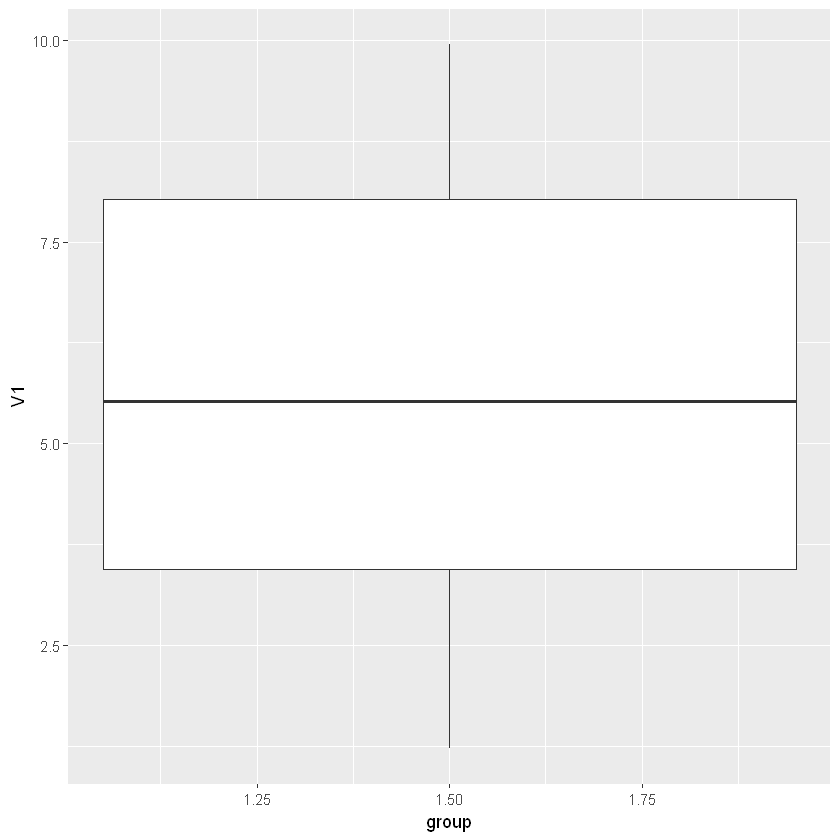

In [6]:
ggplot(df1,aes(x = group, y = V1, group = FALSE)) + geom_boxplot()

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


*With a Linear Regression the command was lm and we had to look at y against x variable so we took V1 against group, 
both variables had to be retrieved from df1. To get the summary from this newyly constructed variable we used the command summary*

In [7]:
reg1 <- lm(V1~group,df1)
summary(reg1)


Call:
lm(formula = V1 ~ group, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49501 -1.05796  0.02595  1.34275  2.37341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4450     0.6707  -2.154   0.0363 *  
group         4.5100     0.4052  11.130 6.78e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.414 on 48 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7149 
F-statistic: 123.9 on 1 and 48 DF,  p-value: 6.783e-15


check if the assumptions of linear regression are met with the `gvlma()` function.

*We checked the reg1 line by putting it into gvlma() and the outcome was that the decisions for each assumption were acceptable for all. *

In [8]:
gvlma(reg1)


Call:
lm(formula = V1 ~ group, data = df1)

Coefficients:
(Intercept)        group  
     -1.445        4.510  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                       Value p-value                Decision
Global Stat        3.756e+00  0.4401 Assumptions acceptable.
Skewness           1.037e-01  0.7474 Assumptions acceptable.
Kurtosis           2.627e+00  0.1050 Assumptions acceptable.
Link Function      5.991e-15  1.0000 Assumptions acceptable.
Heteroscedasticity 1.025e+00  0.3114 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



*Again because we are using R we can use the ggplot package to plot the points of the scatterplot. To get the part o the scatterplot we used geom_point to plot the points, to plot the regression line we used geom_smooth and specified that we wanted it to have the color red, the standard error had to be included which gives us the confidence interval so thats why se = True. The method on how the line had to be determined was lm which stands for linear regression. Furthermore we added the x and y labels as well as a theme by adding all these compartments seperatly.*

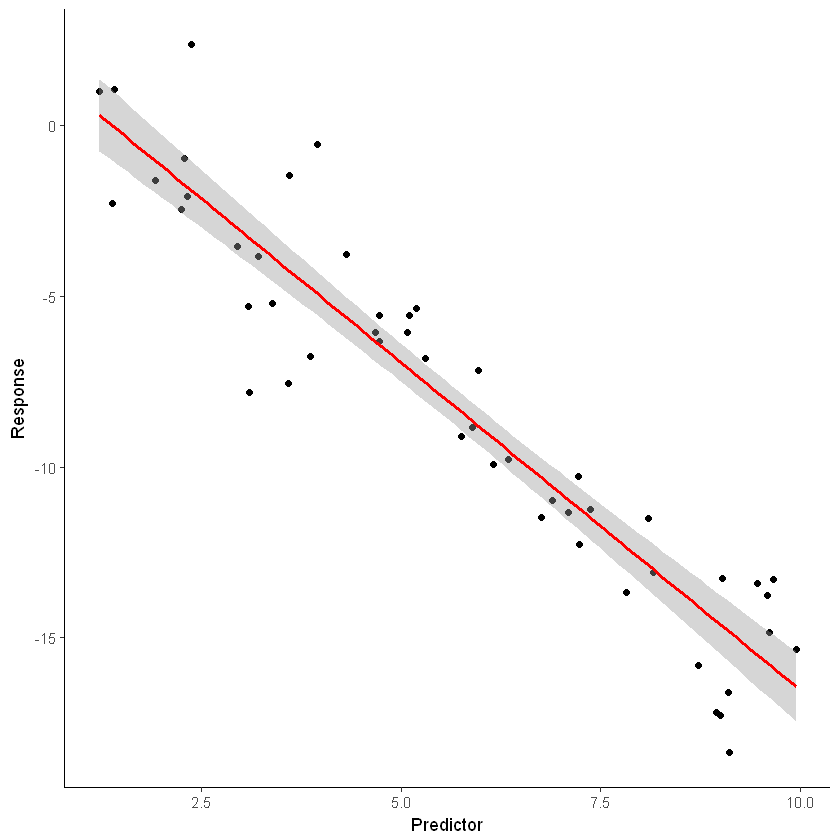

In [142]:
ggplot(df1,aes(x=V1,y=response))+ geom_point()+geom_smooth(method=lm,se=TRUE,col="red")+ xlab("Predictor")+ylab("Response") + theme_classic()

# Assigment 2

# Packages

In [141]:

library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

*We read the csv file just as we learned to in the tutorials and specified that the decimal indicator should be a "." to avoid confussion between a dutch and englisch system. We added the head part just for the check if it worked and if it worked correctly. 

In [46]:
map_municipal <- read.csv2("nld_municipal_map (1).csv",stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

*We added the first map layer without adding points and adding the first layer out of the nld_municipal_map (1).csv we got the map of the Netherlands*

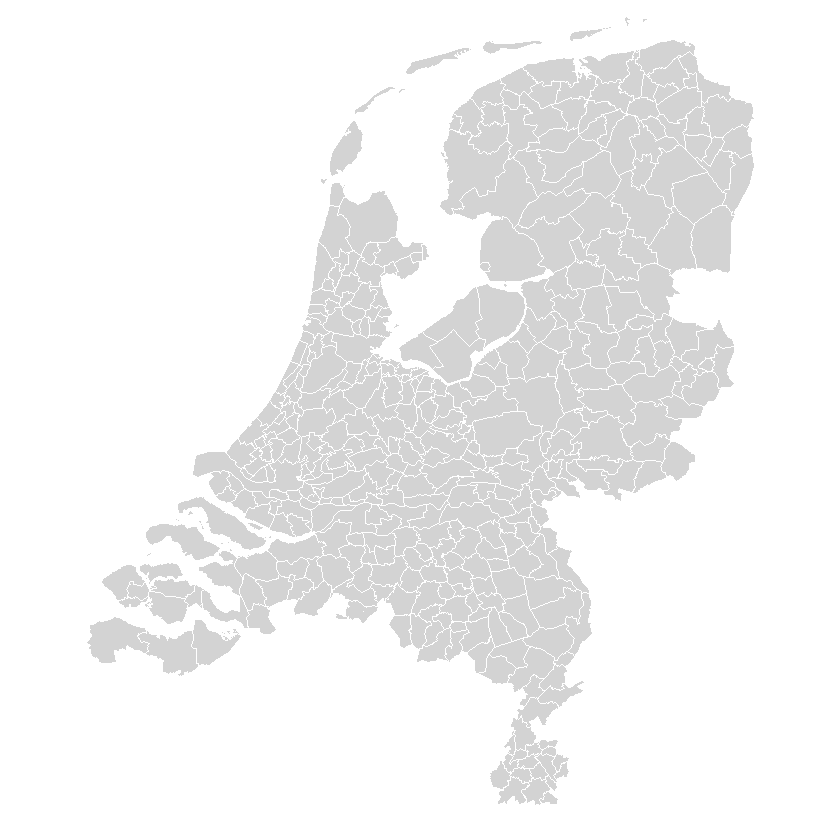

In [47]:
AddMapLayer(MapPlot(),map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

*We also now read the other file into this one and changed the name of the dataset. We also changed the type of X and Y so that the code could read it as numbers and it could use the numbers to plot the points we got in the latter excersices. *

In [48]:
pc4_locations <- read.csv2("nld_pc4_locations (1).csv") %>%
    mutate(X = as.numeric(as.character(X))) %>%
    mutate(Y = as.numeric(as.character(Y)))
str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


* We read in the data just as we did before and changed the name to schools.*

In [140]:
schools <- read.csv2("schools.csv")


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

* We changed the name from schools to schools1 while also mutating the postcode from 6 characters to only four. The number part( what was asked for in the question are the first 4 so thats why we chose to take 0,4 as a part that had to be substringed. Afterwards we selected out of the new data all the Postcodes that now only had numbers as well as the "structure" the school had or which believe it adhered to with 'DENOMINATIE' * 

In [88]:
schools1 <- schools %>% mutate(PC4 = substr(POSTCODE, 0,4))
                               
select(schools1, PC4, DENOMINATIE)




PC4,DENOMINATIE
,Openbaar
9406,Openbaar
9401,Openbaar
9402,Openbaar
9331,Openbaar
9411,Openbaar
9461,Openbaar
9402,Openbaar
9402,Openbaar
9403,Openbaar


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

*We first merged the loctions in the pc4_locations with the locations in the data of schools  1 and by merging them by the criteria of pc4 we only kept the ones that had both of them. After that we filtered the school location out for the schools that were of the denomination of Catholic or Protestant. *

In [143]:
school_loc <- merge(pc4_locations,schools1,by='PC4')

filter(school_loc, DENOMINATIE %in% c("Rooms-Katholiek","Protestants-Christelijk"))




PC4,X,Y,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
1065,116701.2,485645.8,Noord-Holland,41217,01TC,01TC00,Scholengemeenschap voor Vwo Havo Mavo Het Hervormd Lyceum,Hemsterhuisstraat,79,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1071,120223.0,485571.3,Noord-Holland,40776,02AN,02AN00,Fons Vitae Lyceum Rooms Katholiek Scholengemeenschap voor Vwo en Havo,Reijnier Vinkeleskade,53,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1077,120152.7,484262.8,Noord-Holland,41217,02AR,02AR00,Scholengemeenschap voor Athenum en Havo Het Hervormd Lyceum Zuid,Brahmsstraat,7,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1077,120152.7,484262.8,Noord-Holland,40776,14SE,14SE00,Scholengemeenschap Sint Nicolaas Lyceum voor Lyceum en Havo,Beethovenplein,2,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1081,118277.6,482449.5,Noord-Holland,41217,14VY,14VY00,Chr Sgm Buitenveldert v Gymn Ath Havo en Mavo,De Cuserstraat,3,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1132,132947.2,501873.0,Noord-Holland,72853,20GS,20GS01,Don Bosco College Atheneum Havo Vmbo Lwoo,Val van Urk,1,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1132,132947.2,501873.0,Noord-Holland,72853,20GS,20GS00,Don Bosco College Atheneum Havo Vmbo Lwoo,Heideweg,2,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1185,118214.4,478212.6,Noord-Holland,41217,02TE,02TE00,H Wesselink College Christelijke Scholengemeenschap voor Vwo Havo Mavo,Startbaan,3,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1185,118214.4,478212.6,Noord-Holland,71553,02QZ,02QZ00,Keizer Karel College Vwo Havo,Elegast,5,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1211,140459.1,470645.8,Noord-Holland,40676,00PS,00PS10,Verenigde Scholen J.A. Alberdingk Thijm Voortgezet Onderwijs,Achterom,152,...,16,Gooi en Vechtstreek,20,Gooi en Vechtstreek,24,Het Gooi en Vechtstreek,15,Zuid-Noord-Holland,20,Gooi en Vechtstreek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


*First we put the filter we made earlier to a name called Location. After that we only selected the data that we needed to make the points so x and y as well as denomination. This we put into another name called location filtered and this we added to the map in a layer on top of the map of the Netherlands. I aslo included a head but just for the sake of checking if we did it correctly. 

X,Y,DENOMINATIE
116701.2,485645.8,Protestants-Christelijk
120223.0,485571.3,Rooms-Katholiek
120152.7,484262.8,Protestants-Christelijk
120152.7,484262.8,Rooms-Katholiek
118277.6,482449.5,Protestants-Christelijk
132947.2,501873.0,Rooms-Katholiek


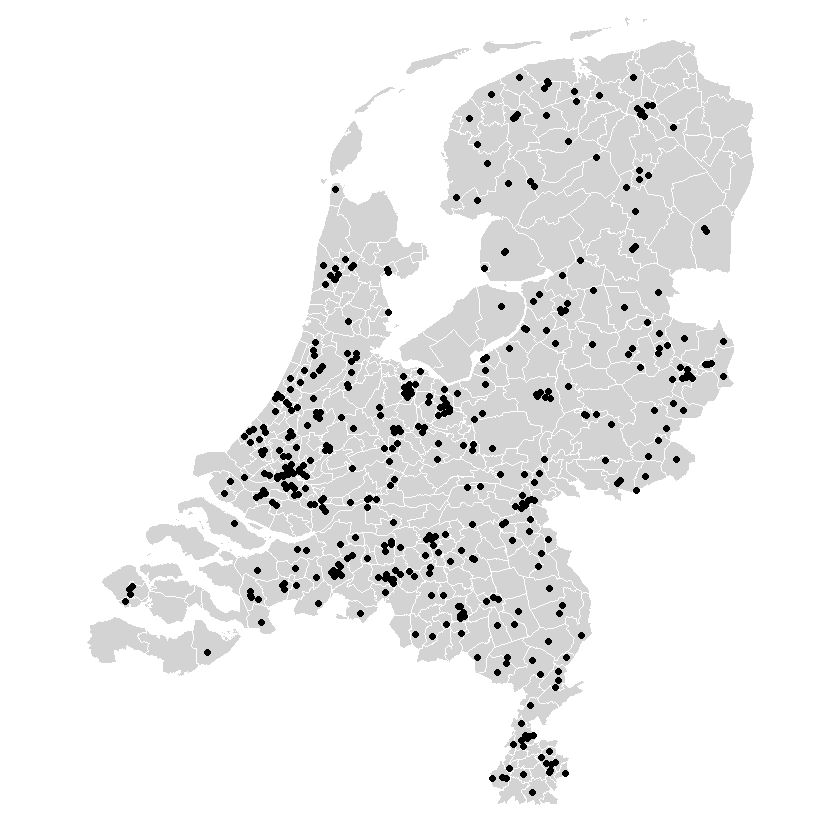

In [138]:
Location<-filter(school_loc, DENOMINATIE %in% c("Rooms-Katholiek","Protestants-Christelijk")) 
Locationfiltered<- select(Location,X,Y,DENOMINATIE)
head(Locationfiltered)

AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(Locationfiltered)
 


End of notebook